# **Lab 2: Digital Imaging Fundamentals with Python**
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS

---
## **Learning Objectives**
* Relate human visual system properties to digital image perception.
* Demonstrate brightness adaptation and contrast effects.
* Simulate sampling and quantisation.
* Work with pixel neighbourhoods and distance measures.
* Apply basic geometric transformations.

## **1. Human Visual Perception: Mach Bands**
**Exercise 1.1:** Simulating Mach bands to show how our eyes perceive transitions.

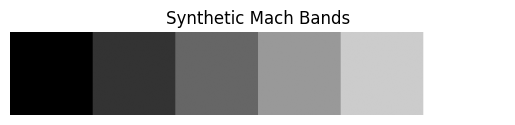

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create Mach Bands
bands = np.zeros((100, 600))
for i in range(6):
    bands[:, i*100 : (i+1)*100] = i*40

plt.imshow(bands, cmap='gray')
plt.title("Synthetic Mach Bands")
plt.axis('off')
plt.show()
#Questions
#1. Do the boundaries between bands appear sharper than the interiors?
# A: Yes. The boundaries look much sharper than the flat regions inside each band because the human visual system exaggerates contrast at edges.
#2. Are these sharp transitions present in the data or only in perception?
# A: They exist only in perception. The pixel values change smoothly in steps of 40, but the brain enhances the contrast at edges.

## **2. Simultaneous Contrast**
**Exercise 2.1:** Perceived brightness depends on the background.

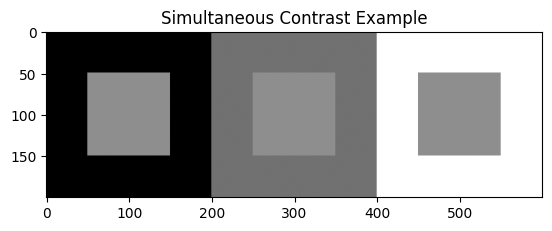

In [10]:
img = np.ones((200, 600)) * 100
img[:, :200] = 20
img[:, 400:] = 200
img[50:150, 50:150] = 120
img[50:150, 250:350] = 120
img[50:150, 450:550] = 120

plt.imshow(img, cmap='gray')
plt.title("Simultaneous Contrast Example")
#plt.axis('off')
plt.show()

#Questions
#1. Does the central rectangle appear equally bright on both backgrounds?
# A: No. It appears darker on the bright background and lighter on the dark background.
#2. What does this imply for interpreting pixel values visually?
# A: It shows that pixel values alone do not determine perceived brightness. Human perception depends heavily on surrounding context.

## **3. Sampling (Spatial Resolution)**
**Exercise 4.1:** Reducing the number of pixels in an image.

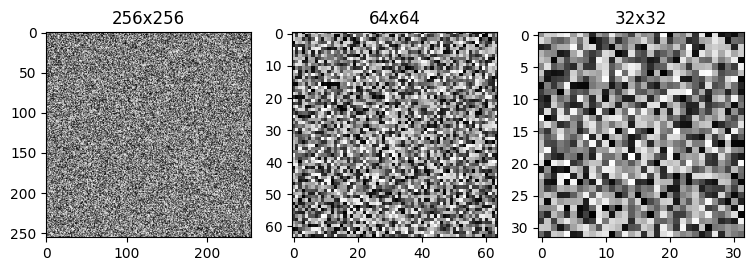

In [11]:
# Create a random image for testing
image = np.random.randint(0, 256, (256, 256))
# هذه ابعاد مو الوان (256, 256)
# Downsampling
down_64 = image[::4, ::4]
down_32 = image[::8, ::8]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title("256x256")
plt.subplot(1,3,2); plt.imshow(down_64, cmap='gray'); plt.title("64x64")
plt.subplot(1,3,3); plt.imshow(down_32, cmap='gray'); plt.title("32x32")
plt.show()

#Task
#Explain how this array corresponds to f(x, y) as defined in the lecture.
# A:
#The 2D array represents the function f(x, y) :
#x → row index
#y → column index

#f(x, y) → intensity value (0–255)

#Each element of the matrix is one pixel.

## **4. Quantisation (Intensity Resolution)**
**Exercise 5.1:** Reducing the number of grey levels.

[  0  16  32  48  64  80  96 112 128 144 160 176 192 208 224 240]


/tmp/ipython-input-3753986759.py:3: RuntimeWarning: divide by zero encountered in floor_divide
  return (img // step) * step # المفروض القيم من صفر الى 15


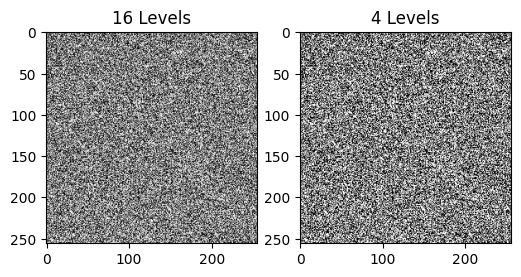

In [12]:
def quantise(img, levels):
    step = 256 // levels #16
    return (img // step) * step # المفروض القيم من صفر الى 15
    # اعرفي ليش قسمنا
# له علاقة في قيم البكسل نفسها ال intensety # خلي 32*32
q256 = quantise(image, 265)
q16 = quantise(image, 16)
q4 = quantise(image, 4)
print(np.unique(q16)) # try this code
plt.figure(figsize=(6,3))
plt.subplot(1,2,1); plt.imshow(q16, cmap='gray'); plt.title("16 Levels")
plt.subplot(1,2,2); plt.imshow(q4, cmap='gray'); plt.title("4 Levels")
plt.show()

#Questions
#1. Which image shows the greatest loss of detail?
# The 32×32 image, because it has the fewest pixels.
#2. Has the number of grey levels changed?
# No. Only the number of pixels changed; the intensity resolution stayed the same.

## **5. Pixel Neighbourhoods (Exercise 7)**
**Task:** Complete the code to define the 4-neighbors ($N_4$) and 8-neighbors ($N_8$) for point $p$.

In [13]:
p = (5, 5)

# Student Task: Define the coordinates relative to p
N4 = [] # Fill here
N8 = [] # Fill here

print("N4 Neighbourhood:", N4)
print("N8 Neighbourhood:", N8)

# p = (5, 5)
x, y = p

# 4-neighbors (up, down, left, right)
N4 = [
    (x-1, y),   # up
    (x+1, y),   # down
    (x, y-1),   # left
    (x, y+1)    # right
]

# 8-neighbors (N4 + diagonals)
N8 = [
    (x-1, y), (x+1, y), (x, y-1), (x, y+1),   # N4
    (x-1, y-1),  # top-left
    (x-1, y+1),  # top-right
    (x+1, y-1),  # bottom-left
    (x+1, y+1)   # bottom-right
]

print('N4 Neighbourhood:', N4)

print("N8 Neighbourhood:", N8)

####3##### homework
#Questions
#1. At which level does banding become noticeable?
# A: Banding becomes clearly visible at 4 levels, and starts to appear at 16 levels
#2. How does this relate to bits per pixel?
# A: 2**bits = Number of levels , Fewer bits → fewer levels → more visible banding.

N4 Neighbourhood: []
N8 Neighbourhood: []
N4 Neighbourhood: [(4, 5), (6, 5), (5, 4), (5, 6)]
N8 Neighbourhood: [(4, 5), (6, 5), (5, 4), (5, 6), (4, 4), (4, 6), (6, 4), (6, 6)]


## **6. Distance Measures (Exercise 8)**
**Task:** Implement the formulas for Euclidean, City-block ($D_4$), and Chessboard ($D_8$) distances.

In [14]:
import math

p = (2, 3)
q = (7, 9)

# Student Task: Implement the formulas

#D_euclid = 0 # Hint: use math.sqrt
#D4 = 0       # Hint: use abs(x1-x2) + abs(y1-y2)
#D8 = 0       # Hint: use max(abs(x1-x2), abs(y1-y2))
x1, y1 = p
x2, y2 = q
D_euclid = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
D4 = abs(x2 - x1) + abs(y2 - y1)
D8 = max(abs(x2 - x1), abs(y2 - y1))

print("Euclidean:" ,D_euclid)
print("City-block(D4):",D4)
print("Chessboard (D8):",D8)

# Which process affects spatial detail?
#Sampling affects spatial detail.
#When you reduce the number of pixels (e.g., from 256×256 to 64×64 or 32×32),
#the image loses edges, shapes, and fine structure because fewer samples are available to represent the scene.

# Which process affects intensity smoothness?
#Quantisation affects intensity smoothness.
#Reducing the number of gray levels (e.g., from 256 to 16 or 4 levels) causes visible banding and removes smooth transitions between brightness values.

Euclidean: 7.810249675906654
City-block(D4): 11
Chessboard (D8): 6


## **7. Geometric Transformations**
**Exercise 9.1 & 10.1:** Translation and Interpolation.

In [15]:
# Write the code here
# Student Task: Define the coordinates relative to p

N4 = [] # Fill here
N8 = [] # Fill here

N4 = [
    (x-1, y),   # up
    (x+1, y),   # down
    (x, y-1),   # left
    (x, y+1)    # right
]

N8 = [
    (x-1, y), (x+1, y), (x, y-1), (x, y+1),   # N4
    (x-1, y-1),  # top-left
    (x-1, y+1),  # top-right
    (x+1, y-1),  # bottom-left
    (x+1, y+1)   # bottom-right
]

print("N4:", N4)
print("N8:", N8)

#Questions
#1. Why does 8 adjacency sometimes create ambiguity?
#2. When is m adjacency preferred?

N4: [(4, 5), (6, 5), (5, 4), (5, 6)]
N8: [(4, 5), (6, 5), (5, 4), (5, 6), (4, 4), (4, 6), (6, 4), (6, 6)]


## **8. Reflection & Mini Project**
**Task:**

1.	Start with a grey scale image
2.	Create three versions with different spatial resolutions
3.	Create three versions with different intensity resolutions
4.	Comment on which degradation affects interpretability more and why

**Your explanation must reference:**


•	Sampling

•	Quantisation

•	Human visual perception
________________________________________
**Reflection questions**

1.	Why is a digital image always an approximation of reality?

2.	How does human perception complicate objective image analysis?

3.	Why is interpolation unavoidable in geometric transformations?

***Note:***

 Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots

task1: Start with a grey scale image

This mini‑project explores how spatial resolution (sampling) and intensity resolution (quantisation) affect the appearance and interpretability of a grayscale image.
We generate multiple degraded versions of the same image and compare how each type of degradation influences human visual perception.

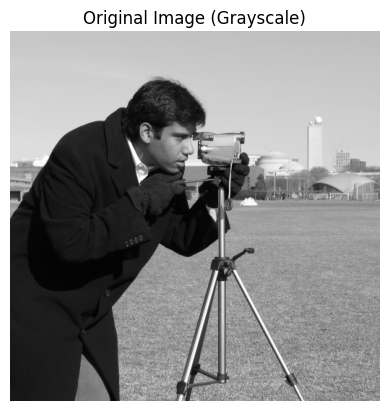

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load a sample grayscale image
image = data.camera()   # already grayscale

plt.imshow(image, cmap='gray')
plt.title("Original Image (Grayscale)")
plt.axis('off')
plt.show()


task2: Create three versions with different spatial resolutions

Spatial resolution refers to the number of pixels used to represent the image.
Reducing spatial resolution removes fine details, edges, and textures because fewer samples are available.

Below, we create three versions:

High resolution

Medium resolution

Low resolution

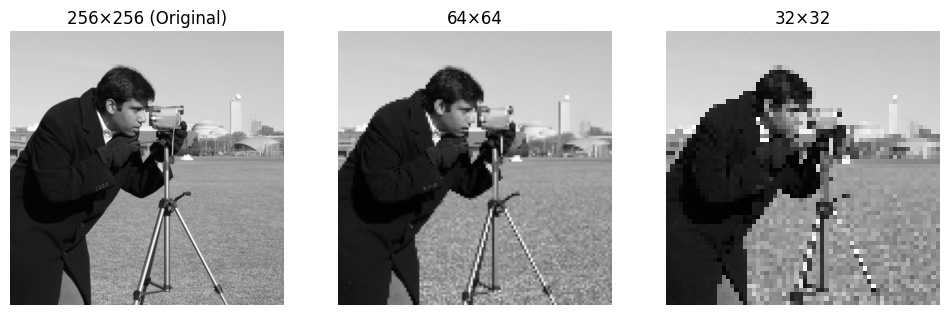

In [18]:
# Downsample by slicing
img_256 = image
img_64 = image[::4, ::4]
img_32 = image[::8, ::8]

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_256, cmap='gray')
plt.title("256×256 (Original)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_64, cmap='gray')
plt.title("64×64")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_32, cmap='gray')
plt.title("32×32")
plt.axis('off')

plt.show()


task3: Create three versions with different intensity resolutions

Intensity resolution refers to the number of gray levels available.
Reducing intensity resolution does not remove shapes or edges, but it reduces smoothness and introduces banding.

We create:

256 levels

16 levels

4 levels

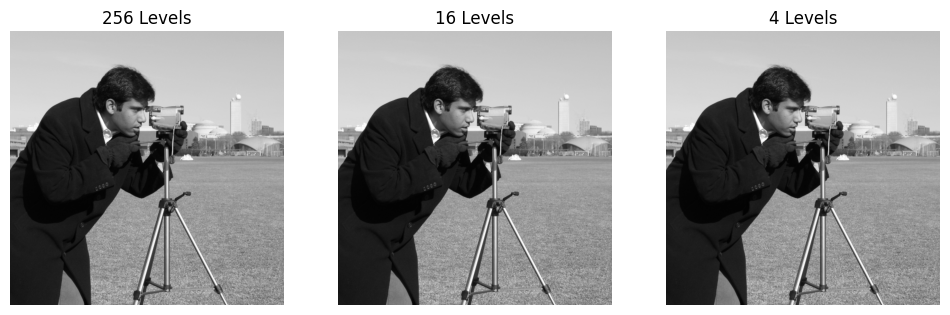

In [19]:
def quantise(img, levels):
    step = 1 / levels
    return (img // step) * step

q256 = quantise(image, 256)
q16 = quantise(image, 16)
q4 = quantise(image, 4)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(q256, cmap='gray')
plt.title("256 Levels")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(q16, cmap='gray')
plt.title("16 Levels")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(q4, cmap='gray')
plt.title("4 Levels")
plt.axis('off')

plt.show()


task4: Comment on which degradation affects interpretability more and why

Which degradation affects interpretability more?
Reducing spatial resolution affects interpretability more than reducing intensity resolution.

Why?
Sampling controls how many pixels represent the structure of the image.
When sampling is low, edges blur, shapes distort, and objects become unrecognizable.

Quantisation only affects smoothness of brightness transitions.
Even with very few gray levels, the overall structure remains visible.

Human visual perception is far more sensitive to spatial detail than to intensity smoothness.
The visual system prioritizes edges and shapes over shading.

Conclusion
Spatial degradation harms recognition more severely because it removes structural information, while quantisation mainly affects shading.

Reflection questions

1. Why is a digital image always an approximation of reality?
Because real scenes are continuous, but digital images use sampling (finite pixels) and quantisation (finite intensity levels).
Both processes reduce infinite real‑world information into a limited digital form.

2. How does human perception complicate objective image analysis?
Human perception is influenced by context, contrast, adaptation, and visual illusions.
Two identical pixel values may appear different depending on their surroundings.
Thus, perception is subjective, while pixel values are objective.

3. Why is interpolation unavoidable in geometric transformations?
Transformations like scaling, rotation, and translation create new pixel positions that do not align with the original grid.
To fill these new positions, the system must estimate pixel values — this estimation is interpolation.
Without interpolation, images would contain gaps or distortions.